In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns

In [40]:
# get the DF used for setting the weights and analysis
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(0.1 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df1 = df[df['radiant_win'].notnull()]

2017-05-18 18:51:12.748721
Using this many files 995


In [42]:

df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df1.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [43]:
df = df[~df['match_id'].duplicated()]

In [71]:
df = df.sort_values(by='residual', ascending=False)

In [72]:
df['match_id'].values.tolist()

[3123948032,
 3123896576,
 3123939584,
 3123914240,
 3123906560,
 3123830272,
 3123921408,
 3123872000,
 3123823616,
 3123836928,
 3123801856,
 3123766016,
 3123793920,
 3123785728,
 3123732992,
 3123680512,
 3123691776,
 3123634944,
 3123633408,
 3123644160,
 3123596800,
 3123639552,
 3123652352,
 3123616512,
 3123585024,
 3123550976,
 3123531520,
 3123523328,
 3123451392,
 3123414272,
 3123535360,
 3123439872,
 3123398144,
 3123345152,
 3123335168,
 3123349760,
 3123294976,
 3123260928,
 3123275520,
 3123248384,
 3123266048,
 3123223296,
 3123228928,
 3123184384,
 3123205888,
 3123201792,
 3123200256,
 3123126528,
 3123114496,
 3122989568]

In [61]:
sns.distplot(np.log(df['residual'].values.tolist()))

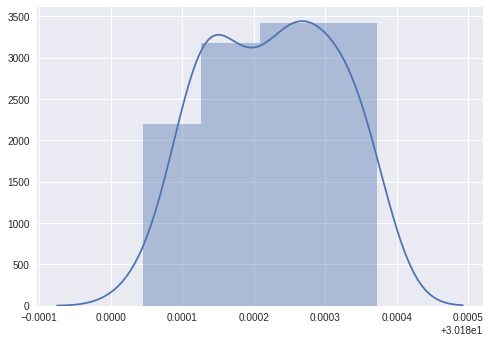

In [62]:
plt.show()

In [49]:
len(df)

50

In [53]:
plt.close()

In [66]:
residuals = df['residual'].values.tolist()

In [67]:
np.max(residuals) - np.min(residuals)

4188012544.0